# Exploratory Data Analysis Of Titanic Dataset

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_set = sns.load_dataset('titanic')

In [3]:
data_set

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


# Perform an initial exploration

Use .info(), .describe(), and .head() to get an overview of the dataset (data types, missing values, basic statistics).
Identify key columns related to the project goals (e.g., age, class, family size, survival).

In [4]:
data_set.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [6]:
data_set.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
data_set.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [8]:
data_set.isnull().sum().sum()

869

Identify key columns

Age: Passenger's age.

Pclass: Passenger class (proxy for socio-economic status).

SibSp: Number of siblings/spouses aboard (for family size).

Parch: Number of parents/children aboard (for family size).

Survived: Whether the passenger survived (0 = No, 1 = Yes).

adult_male:True = The passenger is an adult male. False = The passenger is not an adult male (could be female or child).

deck: This column represents the deck on which the passenger's cabin is located. Values like C indicate specific decks (e.g., Deck C).

In [9]:
data_set['family_size'] = data_set['sibsp'] + data_set['parch']

created a new column called family_size by combining sibsp (siblings/spouse) and parch (parents/children)

In [10]:
data_set.head(30)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,family_size
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True,0
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True,0
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False,4
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False,2
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False,1


Now for better understanding i will have to change columns names like pclass as  Passenger_class, SibSp as Number of siblings and Parch as Number of parents/children  

In [11]:
data_set.rename(columns={'pclass': 'passenger_class', 'sibsp': 'number_of_siblings', 'parch' : 'Number_of_parents/children'}, inplace=True)

In [12]:
data_set.head()

,survived,passenger_class,sex,age,number_of_siblings,Number_of_parents/children,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,family_size
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0


In [13]:
#mapping passenger_class values to descriptive labels
class_mapping = {1: 'Upper class', 2: 'Middle class', 3: 'Lower class'}
data_set['passenger_class'] = data_set['passenger_class'].map(class_mapping)

In [14]:
data_set.head(50)

,survived,passenger_class,sex,age,number_of_siblings,Number_of_parents/children,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,family_size
0,0,Lower class,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1
1,1,Upper class,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1
2,1,Lower class,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0
3,1,Upper class,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1
4,0,Lower class,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0
5,0,Lower class,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True,0
6,0,Upper class,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True,0
7,0,Lower class,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False,4
8,1,Lower class,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False,2
9,1,Middle class,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False,1


Replaced the numeric values in "passenger_class" with the desired descriptive labels.

In [15]:
data_set.rename(columns={ 'Number_of_parents/children' : 'number_of_parents/children'}, inplace=True)

In [16]:
data_set

,survived,passenger_class,sex,age,number_of_siblings,number_of_parents/children,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,family_size
0,0,Lower class,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1
1,1,Upper class,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1
2,1,Lower class,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0
3,1,Upper class,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1
4,0,Lower class,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,Middle class,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,0
887,1,Upper class,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,0
888,0,Lower class,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,3
889,1,Upper class,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,0


Rename the "who" column to "passenger_type" for clarity.  It contains values like "man," "woman," and "child."

In [17]:

data_set.rename(columns={'who': 'passenger_type'}, inplace=True)
data_set

,survived,passenger_class,sex,age,number_of_siblings,number_of_parents/children,fare,embarked,class,passenger_type,adult_male,deck,embark_town,alive,alone,family_size
0,0,Lower class,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1
1,1,Upper class,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1
2,1,Lower class,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0
3,1,Upper class,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1
4,0,Lower class,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,Middle class,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,0
887,1,Upper class,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,0
888,0,Lower class,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,3
889,1,Upper class,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,0


The "class" column, which represents the passenger class,  using "passenger_class" to analyze socio-economic status, so then safely remove the "class" column to avoid confusion.

In [18]:
data_set.drop(columns=['class'], inplace=True)
data_set.head()

,survived,passenger_class,sex,age,number_of_siblings,number_of_parents/children,fare,embarked,passenger_type,adult_male,deck,embark_town,alive,alone,family_size
0,0,Lower class,male,22.0,1,0,7.2500,S,man,True,NaN,Southampton,no,False,1
1,1,Upper class,female,38.0,1,0,71.2833,C,woman,False,C,Cherbourg,yes,False,1
2,1,Lower class,female,26.0,0,0,7.9250,S,woman,False,NaN,Southampton,yes,True,0
3,1,Upper class,female,35.0,1,0,53.1000,S,woman,False,C,Southampton,yes,False,1
4,0,Lower class,male,35.0,0,0,8.0500,S,man,True,NaN,Southampton,no,True,0


 the "embarked" column is redundant, already have the "embark_town" column, which provides the full names of the embarkation locations. Then remove the "embarked" column to simplify the dataset.

In [19]:
data_set.drop(columns=['embarked'], inplace=True)
data_set.head()

,survived,passenger_class,sex,age,number_of_siblings,number_of_parents/children,fare,passenger_type,adult_male,deck,embark_town,alive,alone,family_size
0,0,Lower class,male,22.0,1,0,7.2500,man,True,NaN,Southampton,no,False,1
1,1,Upper class,female,38.0,1,0,71.2833,woman,False,C,Cherbourg,yes,False,1
2,1,Lower class,female,26.0,0,0,7.9250,woman,False,NaN,Southampton,yes,True,0
3,1,Upper class,female,35.0,1,0,53.1000,woman,False,C,Southampton,yes,False,1
4,0,Lower class,male,35.0,0,0,8.0500,man,True,NaN,Southampton,no,True,0


Also we have two columns names survived and alive, Both columns convey the same information regarding whether a passenger survived the Titanic disaster, just in different formats. In that case i will remove survived column and keep alive coulum name as survived, because in this coulumn we have decribe value yes or no for better understanding.

In [20]:
data_set.drop(columns=['survived'], inplace=True)

In [21]:
data_set.rename(columns={'alive': 'survived'}, inplace=True)

In [22]:
data_set

,passenger_class,sex,age,number_of_siblings,number_of_parents/children,fare,passenger_type,adult_male,deck,embark_town,survived,alone,family_size
0,Lower class,male,22.0,1,0,7.2500,man,True,NaN,Southampton,no,False,1
1,Upper class,female,38.0,1,0,71.2833,woman,False,C,Cherbourg,yes,False,1
2,Lower class,female,26.0,0,0,7.9250,woman,False,NaN,Southampton,yes,True,0
3,Upper class,female,35.0,1,0,53.1000,woman,False,C,Southampton,yes,False,1
4,Lower class,male,35.0,0,0,8.0500,man,True,NaN,Southampton,no,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,Middle class,male,27.0,0,0,13.0000,man,True,NaN,Southampton,no,True,0
887,Upper class,female,19.0,0,0,30.0000,woman,False,B,Southampton,yes,True,0
888,Lower class,female,NaN,1,2,23.4500,woman,False,NaN,Southampton,no,False,3
889,Upper class,male,26.0,0,0,30.0000,man,True,C,Cherbourg,yes,True,0


 "fare" is generally well understood in the context of travel, especially regarding ticket prices. it’s fine to keep "fare", but "ticket_price" could enhance clarity for all audiences. So i will change the name as ticket_price 

In [23]:
data_set.rename(columns={'fare': 'ticket_price'}, inplace=True)
data_set.head()

,passenger_class,sex,age,number_of_siblings,number_of_parents/children,ticket_price,passenger_type,adult_male,deck,embark_town,survived,alone,family_size
0,Lower class,male,22.0,1,0,7.2500,man,True,NaN,Southampton,no,False,1
1,Upper class,female,38.0,1,0,71.2833,woman,False,C,Cherbourg,yes,False,1
2,Lower class,female,26.0,0,0,7.9250,woman,False,NaN,Southampton,yes,True,0
3,Upper class,female,35.0,1,0,53.1000,woman,False,C,Southampton,yes,False,1
4,Lower class,male,35.0,0,0,8.0500,man,True,NaN,Southampton,no,True,0


Changing True/False values to "yes/no" in the "alone" column can enhance clarity, making it more understandable

In [24]:
data_set['alone'] = data_set['alone'].map({True: 'yes', False: 'no'})
data_set[['alone']].head()

,alone
0,no
1,no
2,yes
3,no
4,yes


In [25]:
data_set.head()

,passenger_class,sex,age,number_of_siblings,number_of_parents/children,ticket_price,passenger_type,adult_male,deck,embark_town,survived,alone,family_size
0,Lower class,male,22.0,1,0,7.2500,man,True,NaN,Southampton,no,no,1
1,Upper class,female,38.0,1,0,71.2833,woman,False,C,Cherbourg,yes,no,1
2,Lower class,female,26.0,0,0,7.9250,woman,False,NaN,Southampton,yes,yes,0
3,Upper class,female,35.0,1,0,53.1000,woman,False,C,Southampton,yes,no,1
4,Lower class,male,35.0,0,0,8.0500,man,True,NaN,Southampton,no,yes,0


# Check and handle missing values.

Examine columns with missing values

In [26]:
data_set.isnull().sum()

passenger_class                 0
sex                             0
age                           177
number_of_siblings              0
number_of_parents/children      0
ticket_price                    0
passenger_type                  0
adult_male                      0
deck                          688
embark_town                     2
survived                        0
alone                           0
family_size                     0
dtype: int64

In [27]:
# show the percentage of missing values
missing_percentage = data_set.isnull().sum() * 100 / len(data_set)
print(missing_percentage)

passenger_class                0.000000
sex                            0.000000
age                           19.865320
number_of_siblings             0.000000
number_of_parents/children     0.000000
ticket_price                   0.000000
passenger_type                 0.000000
adult_male                     0.000000
deck                          77.216611
embark_town                    0.224467
survived                       0.000000
alone                          0.000000
family_size                    0.000000
dtype: float64


The "age" and "deck" columns have missing values that need to be addressed. The "deck" column has a particularly high percentage of missing data, which may significantly impact analysis. It’s essential to consider appropriate methods for handling these missing values to maintain the integrity of the dataset.

In [28]:
median_value = data_set['age'].median()

In [29]:
print(median_value)

28.0


In [30]:
mean_value = data_set['age'].mean()

In [31]:
print(mean_value)

29.69911764705882


will use median value, because, It's especially good when presenting results to non-technical audiences  

In [32]:
#fill missing values in 'age' with the median
data_set['age'].fillna(data_set['age'].median(), inplace=True)

In [33]:
data_set.isnull().sum()

passenger_class                 0
sex                             0
age                             0
number_of_siblings              0
number_of_parents/children      0
ticket_price                    0
passenger_type                  0
adult_male                      0
deck                          688
embark_town                     2
survived                        0
alone                           0
family_size                     0
dtype: int64

Due to the high percentage of missing values in "deck" column (77.22%), might be consider dropping this column from the dataset. 

In [34]:
data_set.drop(columns=['deck'], inplace=True)
data_set

,passenger_class,sex,age,number_of_siblings,number_of_parents/children,ticket_price,passenger_type,adult_male,embark_town,survived,alone,family_size
0,Lower class,male,22.0,1,0,7.2500,man,True,Southampton,no,no,1
1,Upper class,female,38.0,1,0,71.2833,woman,False,Cherbourg,yes,no,1
2,Lower class,female,26.0,0,0,7.9250,woman,False,Southampton,yes,yes,0
3,Upper class,female,35.0,1,0,53.1000,woman,False,Southampton,yes,no,1
4,Lower class,male,35.0,0,0,8.0500,man,True,Southampton,no,yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,Middle class,male,27.0,0,0,13.0000,man,True,Southampton,no,yes,0
887,Upper class,female,19.0,0,0,30.0000,woman,False,Southampton,yes,yes,0
888,Lower class,female,28.0,1,2,23.4500,woman,False,Southampton,no,no,3
889,Upper class,male,26.0,0,0,30.0000,man,True,Cherbourg,yes,yes,0


In [35]:
data_set.isnull().sum()

passenger_class               0
sex                           0
age                           0
number_of_siblings            0
number_of_parents/children    0
ticket_price                  0
passenger_type                0
adult_male                    0
embark_town                   2
survived                      0
alone                         0
family_size                   0
dtype: int64

now fill 2 missign vlaues in 'embark_town ' column  with the Most Common Value

In [36]:
most_common_town = data_set['embark_town'].mode()[0]
data_set['embark_town'].fillna(most_common_town, inplace=True)

In [37]:
data_set.isnull().sum()

passenger_class               0
sex                           0
age                           0
number_of_siblings            0
number_of_parents/children    0
ticket_price                  0
passenger_type                0
adult_male                    0
embark_town                   0
survived                      0
alone                         0
family_size                   0
dtype: int64

In [38]:
data_set.isnull().sum().sum()

0

Now we have 0 missing value in our dataset. Our dataset is clean.

In [39]:
data_set.head()

,passenger_class,sex,age,number_of_siblings,number_of_parents/children,ticket_price,passenger_type,adult_male,embark_town,survived,alone,family_size
0,Lower class,male,22.0,1,0,7.2500,man,True,Southampton,no,no,1
1,Upper class,female,38.0,1,0,71.2833,woman,False,Cherbourg,yes,no,1
2,Lower class,female,26.0,0,0,7.9250,woman,False,Southampton,yes,yes,0
3,Upper class,female,35.0,1,0,53.1000,woman,False,Southampton,yes,no,1
4,Lower class,male,35.0,0,0,8.0500,man,True,Southampton,no,yes,0


# Univariate Analysis

 Visualize the age distribution using a histogram and boxplot, which will help identify the spread, outliers, and central tendency.

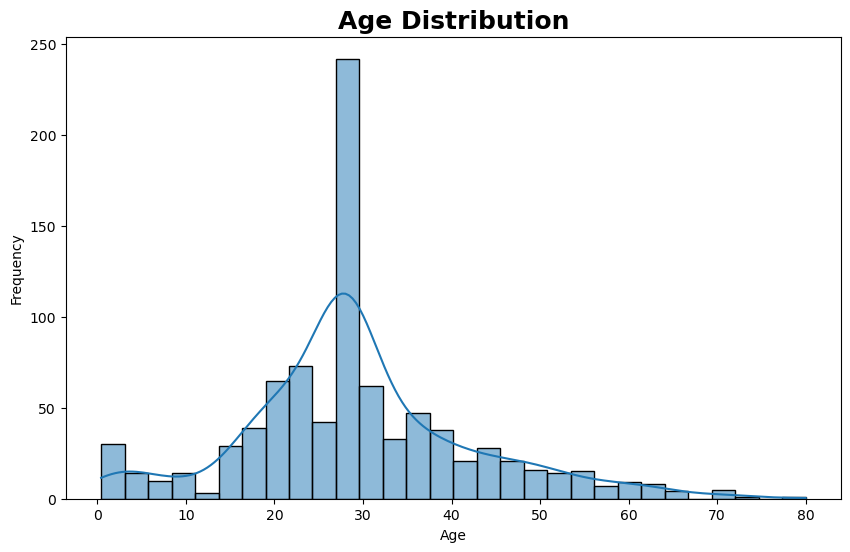

In [40]:
#age distribution  with histogram
plt.figure(figsize=(10, 6))
sns.histplot(data_set['age'], kde= True)
plt.title("Age Distribution", fontsize = 18, fontweight = 'bold')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

This chart shows the age distribution of a population. The bars represent the number of people in each age group, and the line graph shows the overall trend. The highest frequency is in the 20-30 range, meaning most people in the dataset are in their 20s. The frequencies decrease as you move towards younger and older ages.

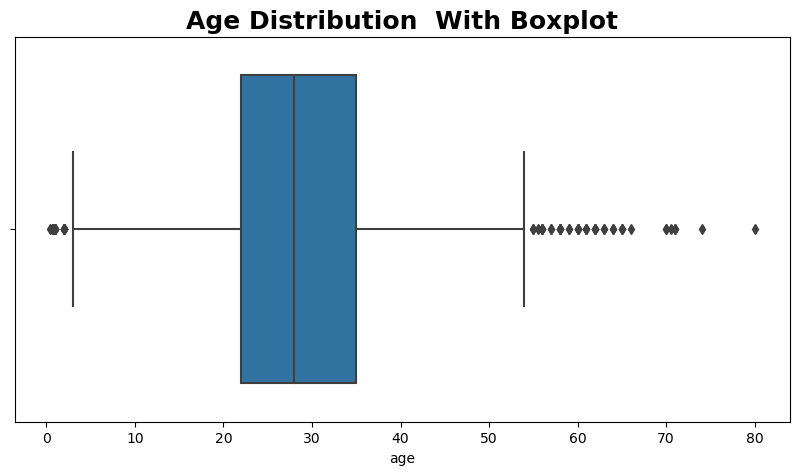

In [41]:
#age distribution with boxplot
plt.figure(figsize=(10,5))
sns.boxplot(x = data_set['age'])
plt.title("Age Distribution  With Boxplot" , fontsize = 18, fontweight = 'bold')
plt.xlabel('age')
plt.show()

The blue box represents the middle 50% of the data (interquartile range), with the line inside the box indicating the median age. The “whiskers” extend to the smallest and largest values within 1.5 times the interquartile range. Any dots outside the whiskers are outliers. This plot helps you quickly see the spread and central tendency of the ages, as well as any unusual values.



# -----------------------------------------------------------------------------------------------------------

Now, visualize the passenger_class to understand how many passengers were in each class.

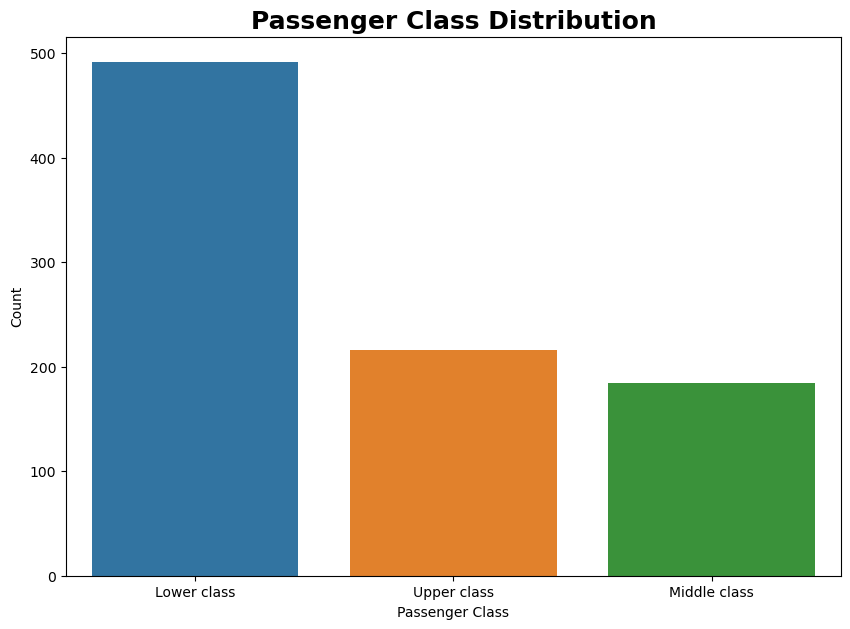

In [42]:
plt.figure(figsize=(10,7))
sns.countplot(x= data_set['passenger_class'])
plt.title('Passenger Class Distribution' , fontsize = 18, fontweight = 'bold')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

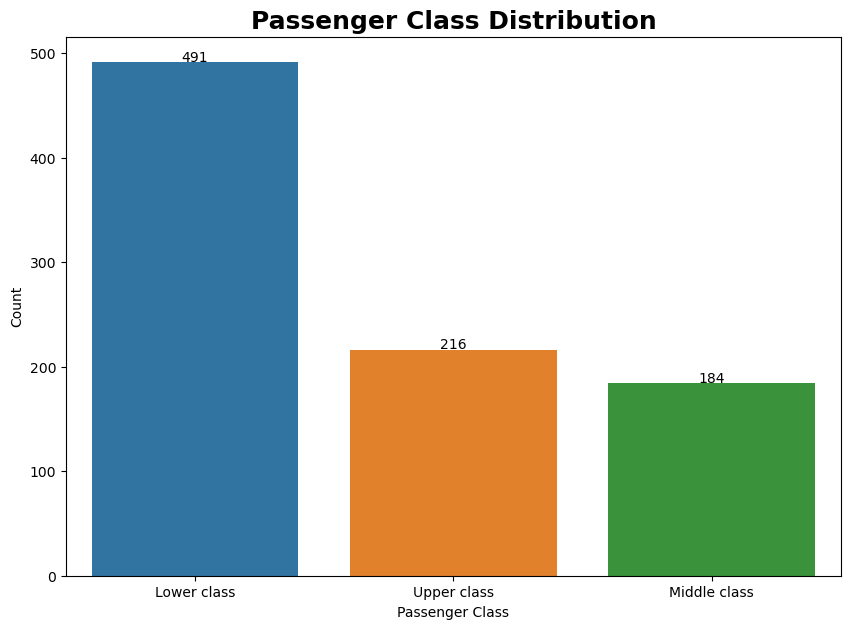

In [43]:
plt.figure(figsize=(10,7))
sns.countplot(x=data_set['passenger_class'])
plt.title('Passenger Class Distribution' , fontsize = 18, fontweight = 'bold')
plt.xlabel('Passenger Class')
plt.ylabel('Count')


for p in plt.gca().patches:
    plt.gca().text(p.get_x() + p.get_width() / 2, 
                   p.get_height() + 1,       
                   int(p.get_height()),       
                   ha='center')               

plt.show()

The distribution of passenger classes shows that the Lower Class had the most passengers with 491, followed by the Upper Class with 216, and the Middle Class with 184. This indicates that most passengers were from the Lower Class, with fewer from the upper and middle classes

# -----------------------------------------------------------------------------------------------------------

Create a histogram to analyze the distributio for Family Size, using family_size column.

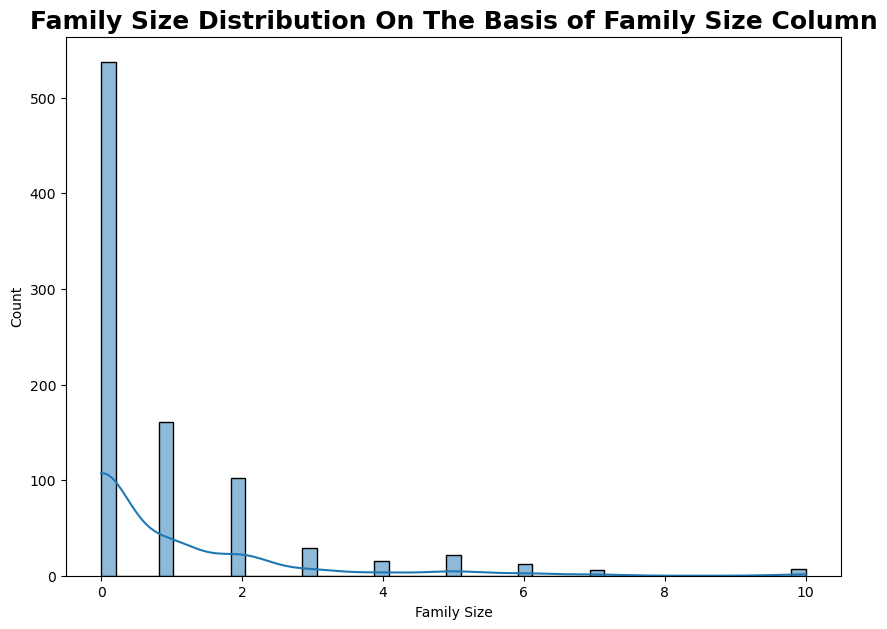

In [44]:
plt.figure(figsize=(10,7))
sns.histplot(data_set['family_size'], kde= True)
plt.title("Family Size Distribution On The Basis of Family Size Column" , fontsize = 18, fontweight = 'bold')
plt.xlabel('Family Size')
plt.ylabel('Count')

plt.show()

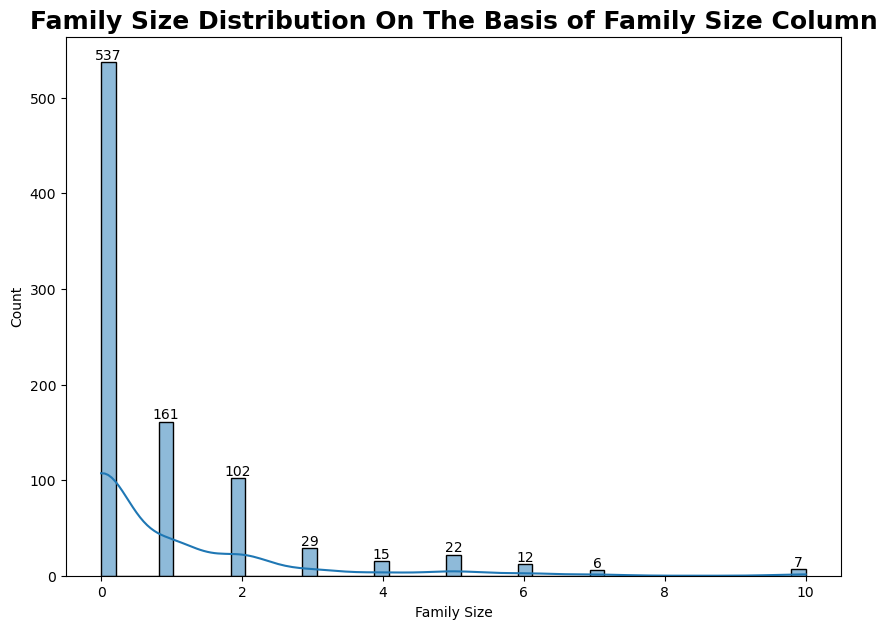

In [45]:
plt.figure(figsize=(10, 7))
sns_hist = sns.histplot(data_set['family_size'], kde=True)
plt.title("Family Size Distribution On The Basis of Family Size Column" , fontsize = 18, fontweight = 'bold')
plt.xlabel('Family Size')
plt.ylabel('Count')

for patch in sns_hist.patches:
    height = patch.get_height()
    if height > 0:  
        plt.text(patch.get_x() + patch.get_width() / 2, height, 
                 f'{int(height)}', ha='center', va='bottom')


plt.show()

In the Family Size Distribution, the highest number of passengers had no family members on board, with 537 passengers having a family size of 0. The smallest group had a family size of 10, with only 7 passengers

# -----------------------------------------------------------------------------------------------------------

Plot the survival rates to see how many passengers survived and how many didn’t.

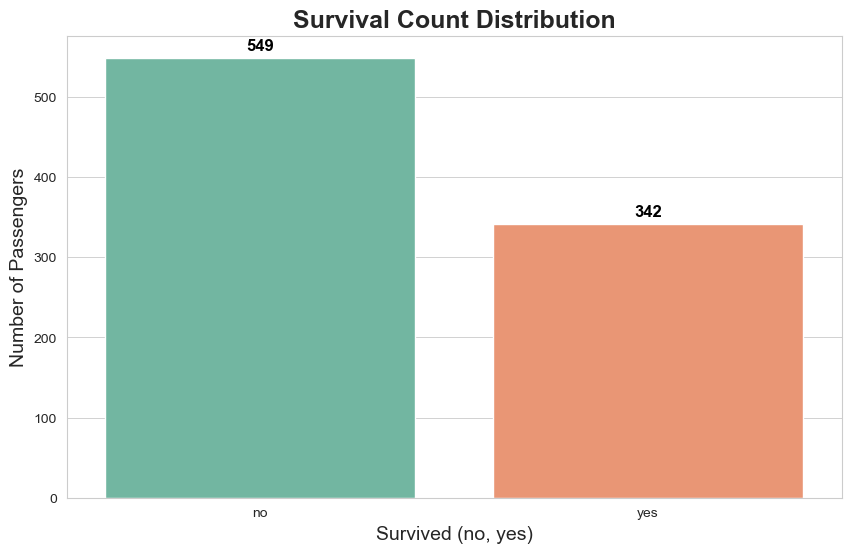

In [67]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x=data_set['survived'], palette='Set2')

for bar in ax.patches:
    count = int(bar.get_height())  
    ax.annotate(f'{count}',          
                (bar.get_x() + bar.get_width() / 2., bar.get_height()),  
                ha='center', va='baseline', fontsize=12, color='black', fontweight='bold', xytext=(0, 5), 
                textcoords='offset points')  


plt.title('Survival Count Distribution', fontsize=18, fontweight='bold')

plt.xlabel('Survived (no, yes)', fontsize=14)
plt.ylabel('Number of Passengers', fontsize=14)
#here, add grid line for y-axis
plt.grid(True, which='major', axis='y', linestyle='-', color='grey', linewidth=0.5, alpha=0.5)

plt.show()

As you can see in the Survival Count Distribution, 549 passengers did not survive, while 342 passengers survived, indicating a lower survival rate overall.

# Bivariate Analysis

analyzing relationships between pairs of features / two variables

Analyze Survival vs. Age

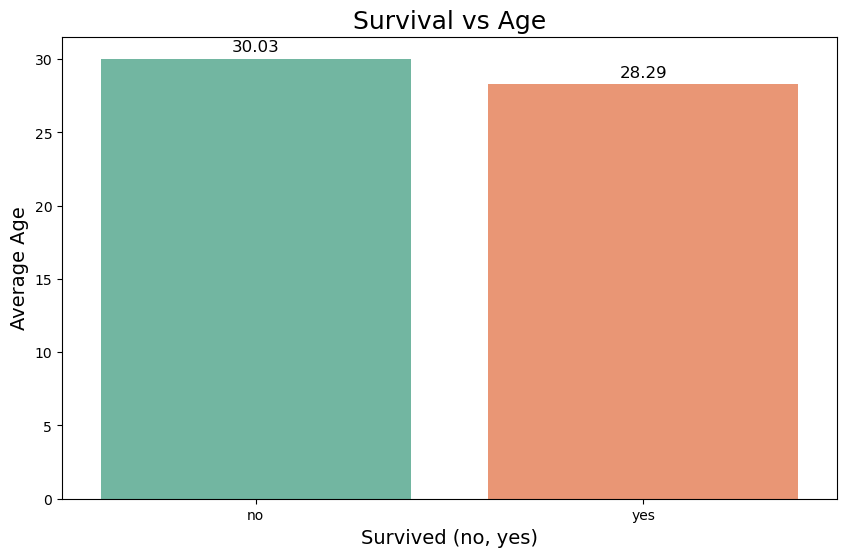

In [47]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='survived', y='age', data=data_set, estimator='mean', errorbar=None, palette='Set2')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.title('Survival vs Age', fontsize=18)
plt.xlabel('Survived (no, yes)', fontsize=14)
plt.ylabel('Average Age', fontsize=14)

plt.show()

Age Distribution for Survival

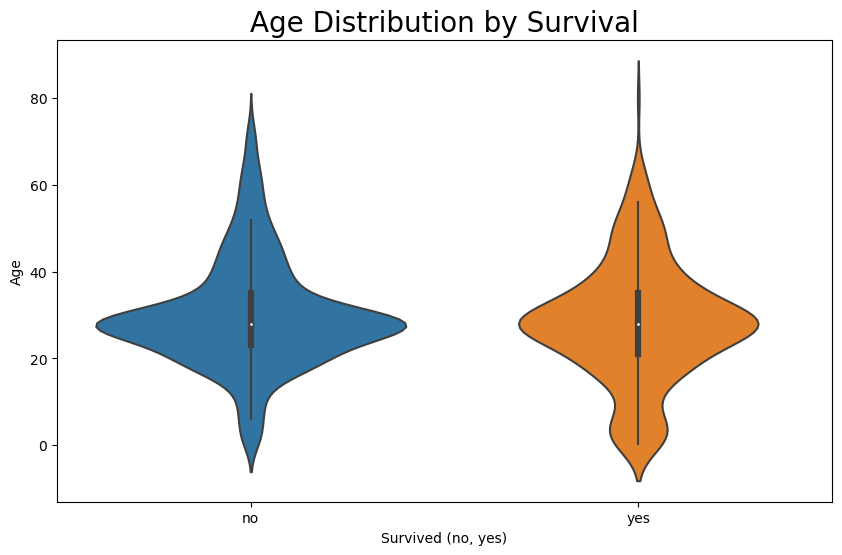

In [48]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='survived', y='age', data=data_set)
plt.title('Age Distribution by Survival', fontsize=20)
plt.xlabel('Survived (no, yes)')
plt.ylabel('Age')
plt.show()

This violin plot shows the age distribution of individuals based on their survival statu. 
Blue violin (no): Represents the age distribution of those who did not survive.
Orange violin (yes): Represents the age distribution of those who survived.

In summary, younger individuals were more likely to not survive, while older individuals had a higher chance of survival

# -----------------------------------------------------------------------------------------------------------

Analyze Survival vs Passenger Class(analyze how passenger class affected survival rates using a barplot)

To run the barplot on the analysis first i will have to create a new column called survived_numeric and use the replace method to convert "no" to 0 and "yes" to 1.

In [49]:
data_set['survived_numeric'] = data_set['survived'].replace({'no': 0, 'yes': 1})

print(data_set[['survived', 'survived_numeric']].head())

  survived  survived_numeric
0       no                 0
1      yes                 1
2      yes                 1
3      yes                 1
4       no                 0


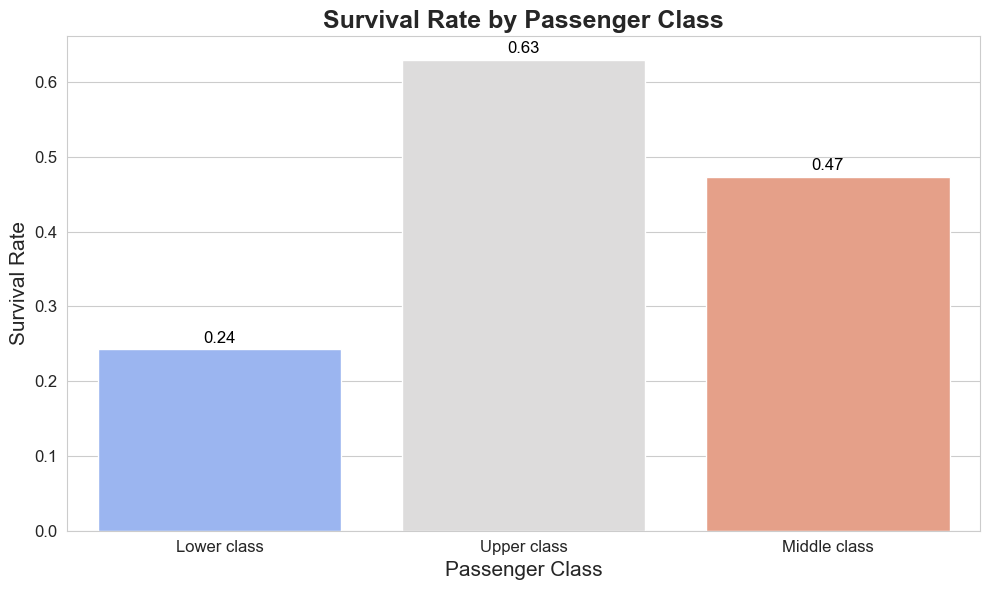

In [50]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='passenger_class', y='survived_numeric', data=data_set, estimator='mean', palette='coolwarm', errorbar=None)


for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), 
                textcoords='offset points')


plt.title('Survival Rate by Passenger Class', fontsize=18, fontweight='bold')
plt.xlabel('Passenger Class', fontsize=15)
plt.ylabel('Survival Rate', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


Lower Class: 24% of passengers survived.
Middle Class: 47% of passengers survived.
Upper Class: 63% of passengers survived.
This indicates that survival chances increased significantly with higher passenger class. Upper-class passengers had the highest survival rate, while lower-class passengers had the lowest. This suggests a strong correlation between socio-economic status and survival likelihood during the disaster.

# -----------------------------------------------------------------------------------------------------------

Analyze Survival vs. Family Size (We’ll analyze how family size impacts survival by creating a barplot for this)

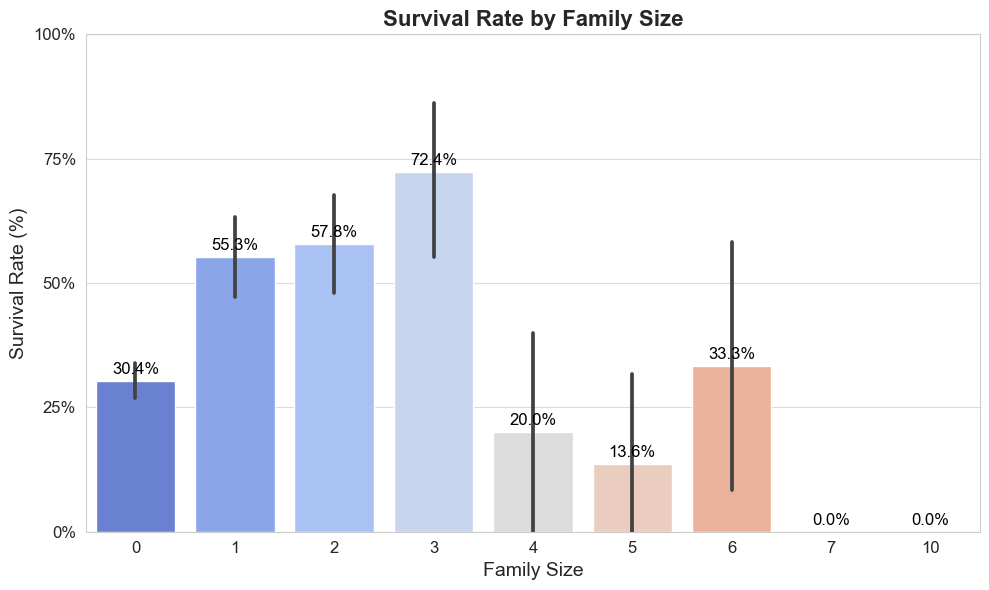

In [51]:
# Create the bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='family_size', y='survived_numeric', data=data_set, palette='coolwarm')

#add numeric values on top of each bar
for p in ax.patches:
    survival_rate = p.get_height() * 100  
    ax.annotate(f'{survival_rate:.1f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), 
                textcoords='offset points')

# Add title and labels
plt.title('Survival Rate by Family Size', fontsize=16, fontweight='bold')
plt.xlabel('Family Size', fontsize=14)
plt.ylabel('Survival Rate (%)', fontsize=14)


plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1 for better visibility
ax.set_yticks([0, 0.25, 0.5, 0.75, 1])
ax.set_yticklabels(['0%', '25%', '50%', '75%', '100%'])


plt.grid(axis='y', linestyle='-', alpha=0.7)

# Adjust layout to prevent clipping
plt.tight_layout()
plt.show()

This plot shows that:
Family size of 3 has the highest survival rate at around 72.4%.
Family sizes of 2 and 1 also have relatively high survival rates at 57.8% and 55.3%, respectively.
Family size of 0 (individuals alone) has a survival rate of 30.4%.
Larger family sizes (4, 5, 6, and 7) have much lower survival rates, with family sizes of 6 and 7 having 0% survival.
This suggests that smaller family sizes, particularly around 3, had better survival rates, while being alone or in very large families was less favorable for survival.

# -----------------------------------------------------------------------------------------------------------

Correlation Analysis (correlation between numerical features (age, family size etc.) and survival)

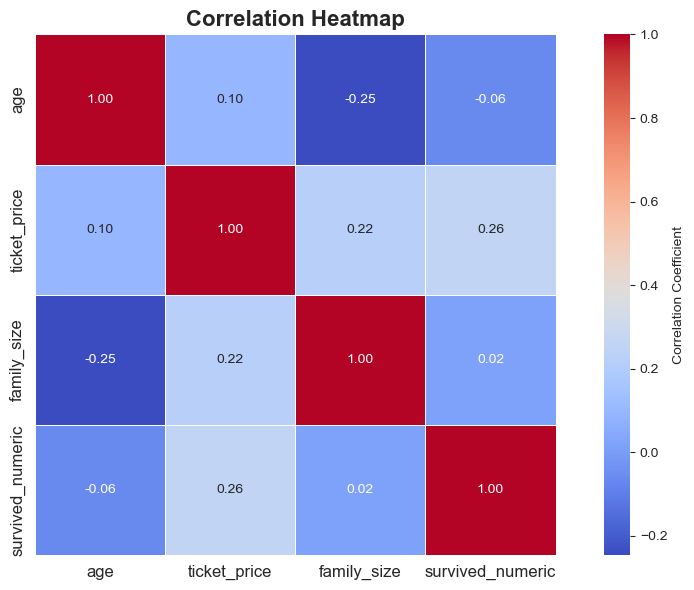

In [52]:
plt.figure(figsize=(10, 6))
corr_matrix = data_set[['age', 'ticket_price', 'family_size', 'survived_numeric']].corr()

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, 
            cbar_kws={'label': 'Correlation Coefficient' }, square=True)

plt.title('Correlation Heatmap', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(False)


plt.tight_layout()  
plt.show()

Age and Ticket Price: Slight positive correlation (0.10), indicating older individuals might have paid slightly higher ticket prices.

Age and Family Size: Slight negative correlation (-0.25), suggesting older individuals tend to have smaller family sizes.

Age and Survival: Very weak positive correlation (0.06), indicating age has a minimal impact on survival.

Ticket Price and Family Size: Weak positive correlation (0.22), suggesting higher ticket prices might be associated with slightly larger family sizes.

Ticket Price and Survival: Moderate positive correlation (0.26), indicating higher ticket prices are somewhat associated with higher survival rates.

Family Size and Survival: Very weak positive correlation (0.02), showing family size has a minimal impact on survival.
Overall, the strongest correlation is between ticket price and survival, but even this is relatively weak

# -----------------------------------------------------------------------------------------------------------

Survival Against Age (will help visualize the distribution of ages for both survived and not survived passengers.)

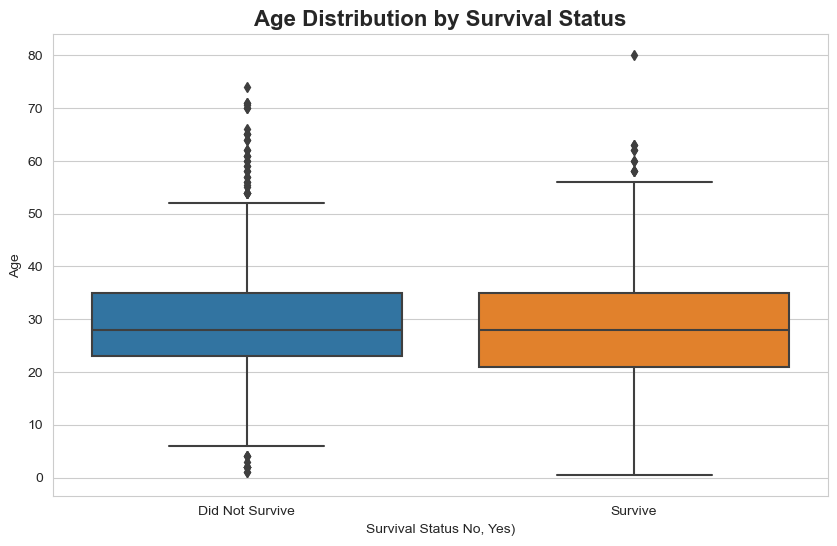

In [53]:
plt.figure(figsize=(10,6))
sns.boxplot(x = 'survived_numeric', y= 'age', data = data_set)
plt.title('Age Distribution by Survival Status', fontsize=16, fontweight='bold')
plt.xlabel('Survival Status No, Yes)')
plt.ylabel('Age')
plt.xticks([0,1], ['Did Not Survive', 'Survive'])
plt.show()

In [54]:
data_set

,passenger_class,sex,age,number_of_siblings,number_of_parents/children,ticket_price,passenger_type,adult_male,embark_town,survived,alone,family_size,survived_numeric
0,Lower class,male,22.0,1,0,7.2500,man,True,Southampton,no,no,1,0
1,Upper class,female,38.0,1,0,71.2833,woman,False,Cherbourg,yes,no,1,1
2,Lower class,female,26.0,0,0,7.9250,woman,False,Southampton,yes,yes,0,1
3,Upper class,female,35.0,1,0,53.1000,woman,False,Southampton,yes,no,1,1
4,Lower class,male,35.0,0,0,8.0500,man,True,Southampton,no,yes,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,Middle class,male,27.0,0,0,13.0000,man,True,Southampton,no,yes,0,0
887,Upper class,female,19.0,0,0,30.0000,woman,False,Southampton,yes,yes,0,1
888,Lower class,female,28.0,1,2,23.4500,woman,False,Southampton,no,no,3,0
889,Upper class,male,26.0,0,0,30.0000,man,True,Cherbourg,yes,yes,0,1


In [55]:
data_set.drop(columns=['alone'], inplace=True)
data_set

,passenger_class,sex,age,number_of_siblings,number_of_parents/children,ticket_price,passenger_type,adult_male,embark_town,survived,family_size,survived_numeric
0,Lower class,male,22.0,1,0,7.2500,man,True,Southampton,no,1,0
1,Upper class,female,38.0,1,0,71.2833,woman,False,Cherbourg,yes,1,1
2,Lower class,female,26.0,0,0,7.9250,woman,False,Southampton,yes,0,1
3,Upper class,female,35.0,1,0,53.1000,woman,False,Southampton,yes,1,1
4,Lower class,male,35.0,0,0,8.0500,man,True,Southampton,no,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,Middle class,male,27.0,0,0,13.0000,man,True,Southampton,no,0,0
887,Upper class,female,19.0,0,0,30.0000,woman,False,Southampton,yes,0,1
888,Lower class,female,28.0,1,2,23.4500,woman,False,Southampton,no,3,0
889,Upper class,male,26.0,0,0,30.0000,man,True,Cherbourg,yes,0,1


In [56]:
data_set.head()

,passenger_class,sex,age,number_of_siblings,number_of_parents/children,ticket_price,passenger_type,adult_male,embark_town,survived,family_size,survived_numeric
0,Lower class,male,22.0,1,0,7.2500,man,True,Southampton,no,1,0
1,Upper class,female,38.0,1,0,71.2833,woman,False,Cherbourg,yes,1,1
2,Lower class,female,26.0,0,0,7.9250,woman,False,Southampton,yes,0,1
3,Upper class,female,35.0,1,0,53.1000,woman,False,Southampton,yes,1,1
4,Lower class,male,35.0,0,0,8.0500,man,True,Southampton,no,0,0


Survival Rates by Age Group and Passenger Class, for indepth analysis

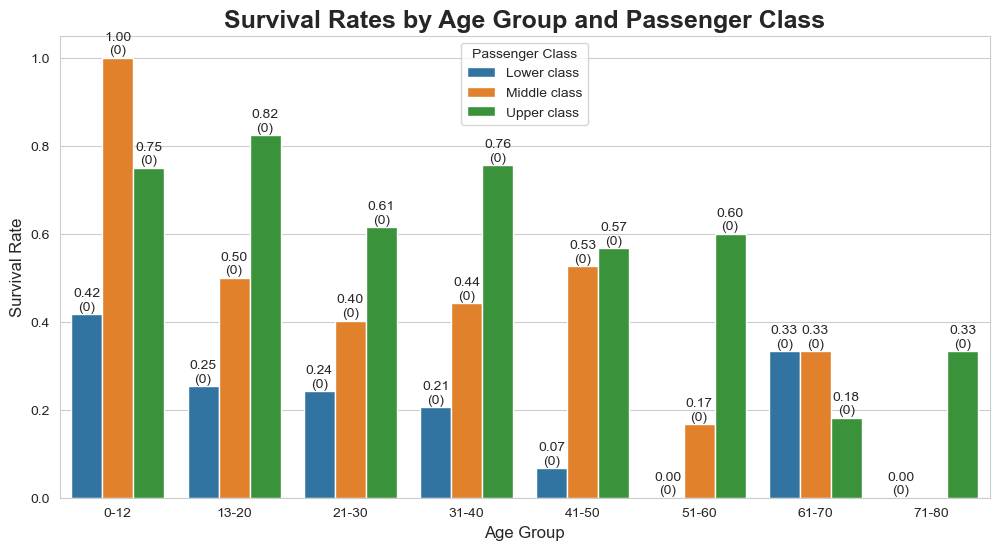

In [57]:
bins = [0, 12, 20, 30, 40, 50, 60, 70, 80]
labels = ['0-12', '13-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']
data_set['age_group'] = pd.cut(data_set['age'], bins=bins, labels=labels)

# Grouping by passenger class and age group to calculate survival rates and counts
survival_by_age_class = data_set.groupby(['passenger_class', 'age_group']).agg(
    survival_rate=('survived_numeric', 'mean'),
    passenger_count=('survived_numeric', 'size')
).reset_index()


plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x='age_group', y='survival_rate', hue='passenger_class', data=survival_by_age_class)

# Annotating each bar with the passenger count and survival rate rounded to 2 decimal places
for p in bar_plot.patches:
    # Positioning the annotation
    bar_plot.annotate(f"{p.get_height():.2f}\n({int(p.get_width())})", 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', 
                      size=10, 
                      xytext = (0, 10), 
                      textcoords = 'offset points')


plt.title('Survival Rates by Age Group and Passenger Class', fontsize=18, fontweight='bold')
plt.xlabel('Age Group' ,fontsize=12)
plt.ylabel('Survival Rate' ,fontsize=12)
plt.legend(title='Passenger Class')

plt.show()



- Higher Survival in Upper Class: Upper class passengers had higher survival rates across all age groups.
- Children's Survival: Younger age groups (0-12) had higher survival rates, especially in the Upper class.
- Middle and Lower Classes: Lower survival rates in Middle and Lower classes, with significant drops in older age groups.
- Annotations: Each bar is annotated with the passenger count and survival rate.


# Multivariate Analysis

Multivariate analysis helps understand how multiple factors interact and influence outcomes. For Example exploring how factors like age, class, and gender together affect survival rates.

Survival by Age and Class (Violin Plot)

This will help visualize how age and class together influence survival rates.

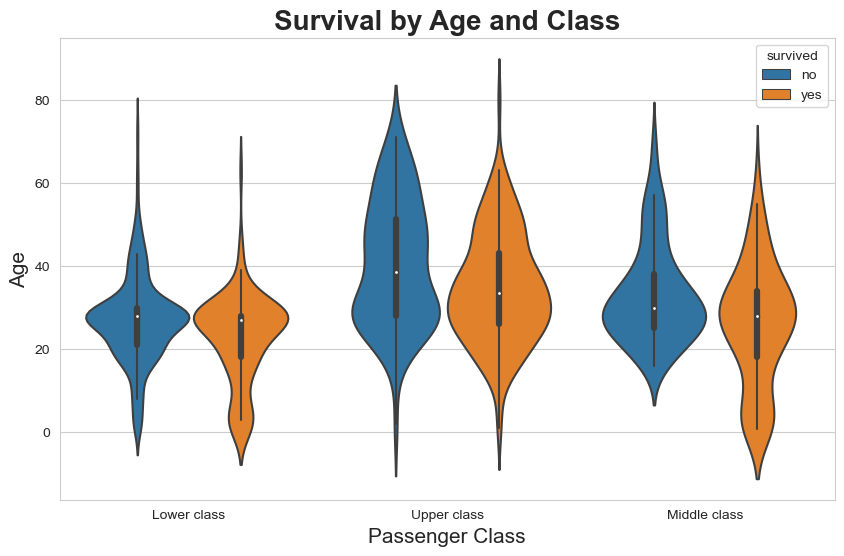

In [58]:
plt.figure(figsize=(10,6))
sns.violinplot(x= 'passenger_class', y = 'age', hue='survived', data= data_set)
plt.title('Survival by Age and Class', fontweight = 'bold', fontsize = 20)
plt.xlabel('Passenger Class',  fontsize = 15)
plt.ylabel('Age' , fontsize = 15)
plt.show()

- Upper Class: Passengers in the Upper class had higher survival rates across all age groups. The distribution shows a significant number of survivors, especially among younger passengers.
- Children: Younger age groups (0-12) had higher survival rates, particularly in the Upper class. This indicates that children were given priority during the evacuation.
- Middle and Lower Classes: Survival rates were lower in the Middle and Lower classes. Older passengers in these classes had notably lower survival rates, highlighting the impact of both age and class on survival chances.
- Insights: The violin plot provides a clear visualization of the age distribution for survivors and non-survivors within each class, showing the density and spread of ages.


------------------------------------------------------------------------------------------------------------------

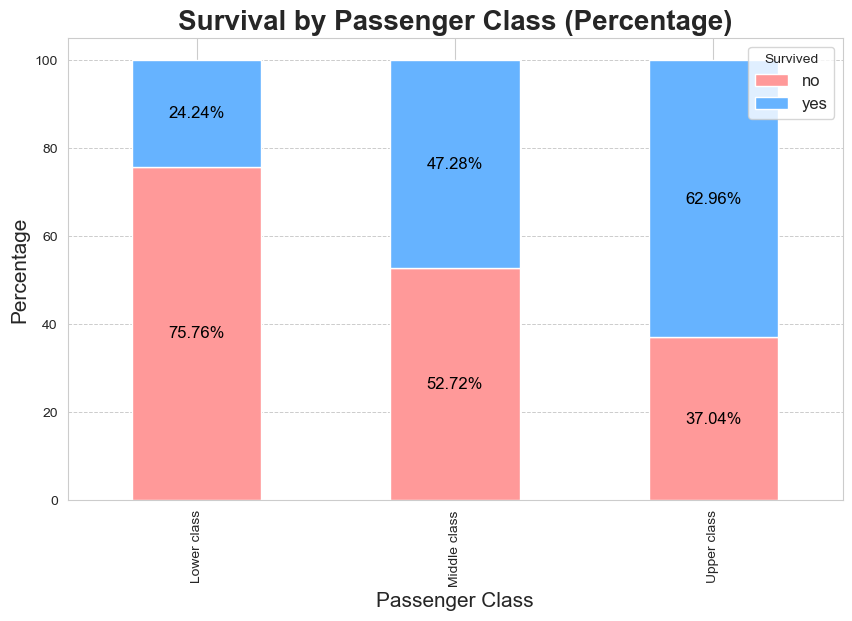

In [66]:
# Create a pivot table to get the count of each combination of 'passenger_class' and 'survived'
pivot_table = data_set.pivot_table(index='passenger_class', 
                                   columns='survived', 
                                   values='age',  # You can use any column here, 'age' is used just to count entries.
                                   aggfunc='count', 
                                   fill_value=0)

# Calculate percentages for survivors and non-survivors
pivot_table_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

# Plot the stacked bar chart
fig, ax = plt.subplots(figsize=(10,6))
colors = ['#ff9999', '#66b3ff']  # Custom colors for 'no' and 'yes'

pivot_table_percentage.plot(kind='bar', stacked=True, ax=ax, color=colors)

# Set plot title and labels
plt.title('Survival by Passenger Class (Percentage)', fontweight='bold', fontsize=20)
plt.xlabel('Passenger Class', fontsize=15)
plt.ylabel('Percentage', fontsize=15)

# Add percentage labels on the bars
for i in range(pivot_table_percentage.shape[0]):
    cumulative = 0  # Keep track of cumulative height to place the text
    for j in range(pivot_table_percentage.shape[1]):
        percentage = pivot_table_percentage.iloc[i, j]
        if percentage > 0:  # Avoid placing text for empty (0%) segments
            ax.text(i, cumulative + percentage / 2, f'{percentage:.2f}%', 
                    ha='center', va='center', color='black', fontsize=12)
        cumulative += percentage  # Add the current percentage to the cumulative

plt.legend(title='Survived', loc='upper right', fontsize=12)
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7)
plt.show()

# -----------------------------------------------------------------------------------------------------------

Survival by Age and Gender

it will show whether males or females had better survival chances based on age.

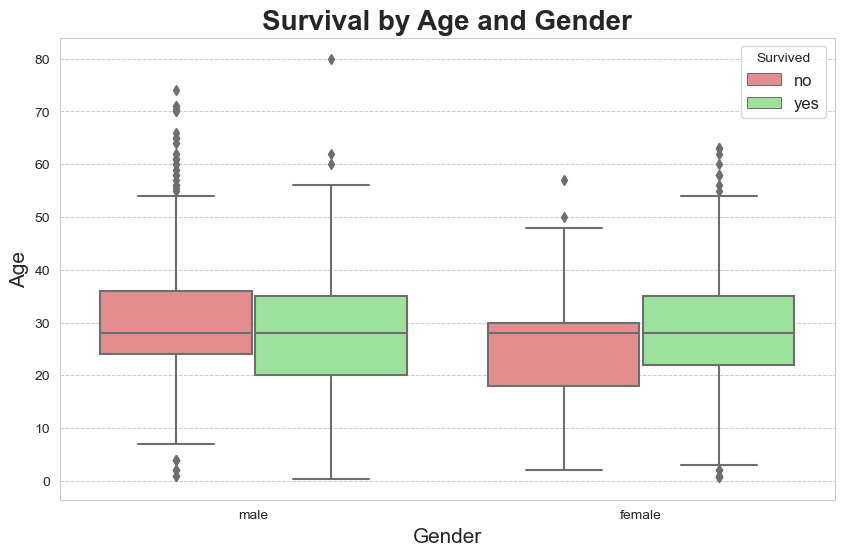

In [60]:
plt.figure(figsize=(10, 6))
palette = {'no': "lightcoral", 'yes': "lightgreen"}
sns.boxplot(x='sex', y='age', hue='survived', data=data_set, palette=palette)
plt.title('Survival by Age and Gender', fontweight='bold', fontsize=20)
plt.xlabel('Gender', fontsize=15)
plt.ylabel('Age', fontsize=15)
plt.legend(title='Survived', loc='upper right', fontsize=12)
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7)
plt.show()

- Females: Higher survival rates across all age groups.
- Males: Lower survival rates, especially among adults (36+).
- Higher survival rates for both genders, but females still had an edge.

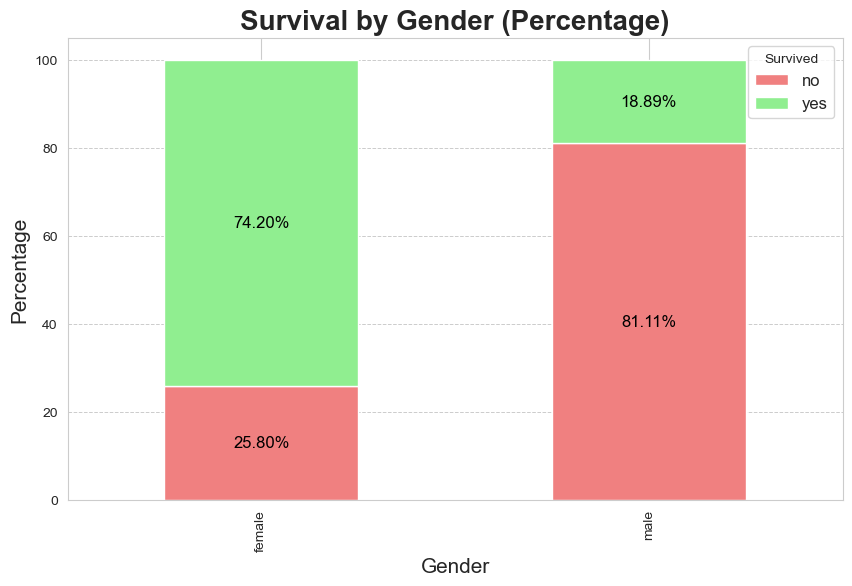

In [61]:
# Create a pivot table to get the count of each combination of 'sex' and 'survived'
pivot_table = data_set.pivot_table(index='sex', 
                                   columns='survived', 
                                   values='age', 
                                   aggfunc='count', 
                                   fill_value=0)

# Calculate percentages for survivors and non-survivors
pivot_table_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

# Plot the stacked bar chart
fig, ax = plt.subplots(figsize=(10,6))
colors = ['lightcoral', 'lightgreen']  # Custom colors for 'no' and 'yes'

pivot_table_percentage.plot(kind='bar', stacked=True, ax=ax, color=colors)

# Set plot title and labels
plt.title('Survival by Gender (Percentage)', fontweight='bold', fontsize=20)
plt.xlabel('Gender', fontsize=15)
plt.ylabel('Percentage', fontsize=15)

# Now, i will add percentage labels on the bars usgin for loop
for i in range(pivot_table_percentage.shape[0]):
    cumulative = 0  # Keep track of cumulative height to place the text
    for j in range(pivot_table_percentage.shape[1]):
        percentage = pivot_table_percentage.iloc[i, j]
        if percentage > 0:  # Avoid placing text for empty (0%) segments
            ax.text(i, cumulative + percentage / 2, f'{percentage:.2f}%', 
                    ha='center', va='center', color='black', fontsize=12)
        cumulative += percentage  

plt.legend(title='Survived', loc='upper right', fontsize=12)
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7)
plt.show()

# -----------------------------------------------------------------------------------------------------------

In [62]:
data_set.head()

,passenger_class,sex,age,number_of_siblings,number_of_parents/children,ticket_price,passenger_type,adult_male,embark_town,survived,family_size,survived_numeric,age_group
0,Lower class,male,22.0,1,0,7.2500,man,True,Southampton,no,1,0,21-30
1,Upper class,female,38.0,1,0,71.2833,woman,False,Cherbourg,yes,1,1,31-40
2,Lower class,female,26.0,0,0,7.9250,woman,False,Southampton,yes,0,1,21-30
3,Upper class,female,35.0,1,0,53.1000,woman,False,Southampton,yes,1,1,31-40
4,Lower class,male,35.0,0,0,8.0500,man,True,Southampton,no,0,0,31-40


Survival by Class and Family Size (Bar Plot)
This shows the relationship between family size, class, and survival.

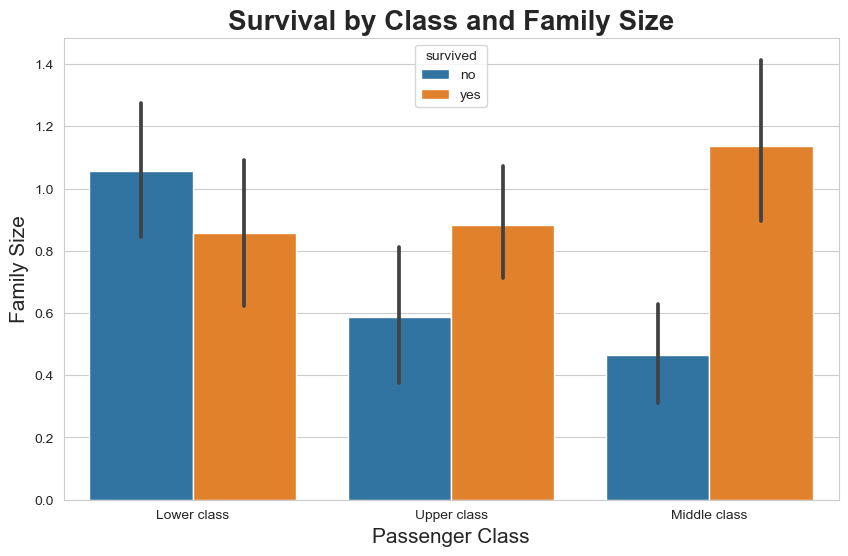

In [63]:
plt.figure(figsize=(10,6))
sns.barplot(x='passenger_class', y = 'family_size', hue= 'survived', data=data_set)
plt.title('Survival by Class and Family Size', fontweight='bold', fontsize=20)
plt.xlabel('Passenger Class', fontsize=15)
plt.ylabel('Family Size', fontsize=15)
plt.show()

- Passenger Class Impact:

Upper Class: Passengers in the upper class had higher survival rates compared to those in the middle and lower classes. This suggests that socio-economic status played a significant role in survival chances.

Lower Class: Passengers in the lower class had the lowest survival rates, indicating they were at a disadvantage during the event.

- Family Size Influence:

Smaller Families: Passengers with smaller family sizes (0-2 members) had higher survival rates across all classes. This could be due to easier mobility and fewer dependents to manage during the crisis.

Larger Families: As family size increased, survival rates generally decreased. Larger families might have faced more challenges in staying together and finding enough space in lifeboats.

- Class and Family Size Interaction:

Upper Class with Small Families: This group had the highest survival rates, highlighting the combined advantage of higher socio-economic status and smaller family size.

Lower Class with Large Families: This group had the lowest survival rates, showing the compounded disadvantage of lower socio-economic status and larger family size.

These insights suggest that both socio-economic status and family size were critical factors influencing survival rates in titanic historical event.

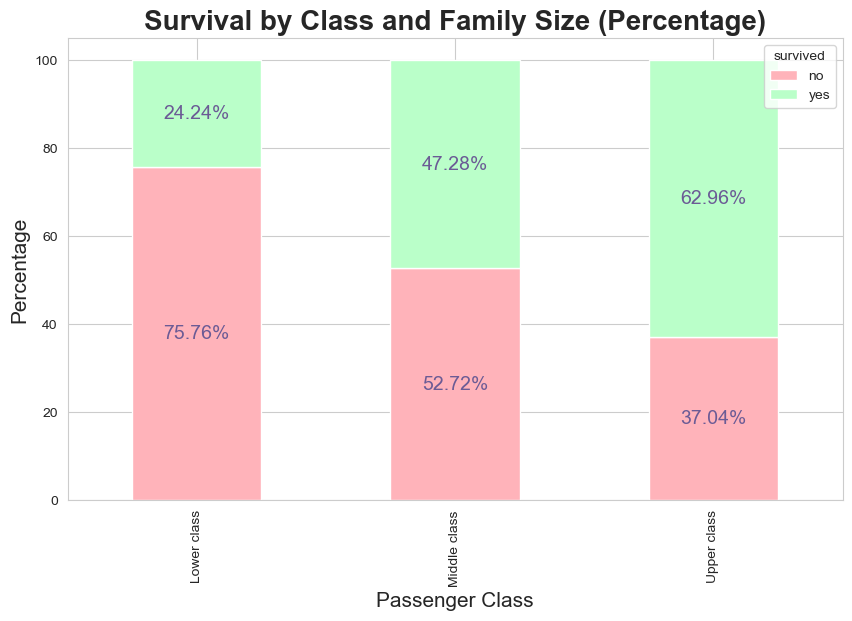

In [64]:
pivot_table = data_set.pivot_table(index='passenger_class', 
                                   columns='survived', 
                                   values='family_size', 
                                   aggfunc='count', 
                                   fill_value=0)

# Frist, will have to calculate percentages for survivors and non-survivors
pivot_table_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100


ax = pivot_table_percentage.plot(kind='bar', stacked=True, figsize=(10,6), color=['#ffb3ba', '#baffc9'])

plt.title('Survival by Class and Family Size (Percentage)', fontweight='bold', fontsize=20)
plt.xlabel('Passenger Class', fontsize=15)
plt.ylabel('Percentage', fontsize=15)

# For Add percentage labels in chart
for i in range(pivot_table_percentage.shape[0]):
    cumulative = 0  # Keep track of cumulative height to place the text
    for j in range(pivot_table_percentage.shape[1]):
        percentage = pivot_table_percentage.iloc[i, j]
        if percentage > 0:  # Avoid placing text for empty (0%) segments
            ax.text(i, cumulative + percentage / 2, f'{percentage:.2f}%', 
                    ha='center', va='center', color='#6b5b95', fontsize=14)
        cumulative += percentage  # Add the current percentage to the cumulative

plt.show()


# -----------------------------------------------------------------------------------------------------------

Correlation Heatmap, it will help to identify which numerical factors are strongly related to survival.

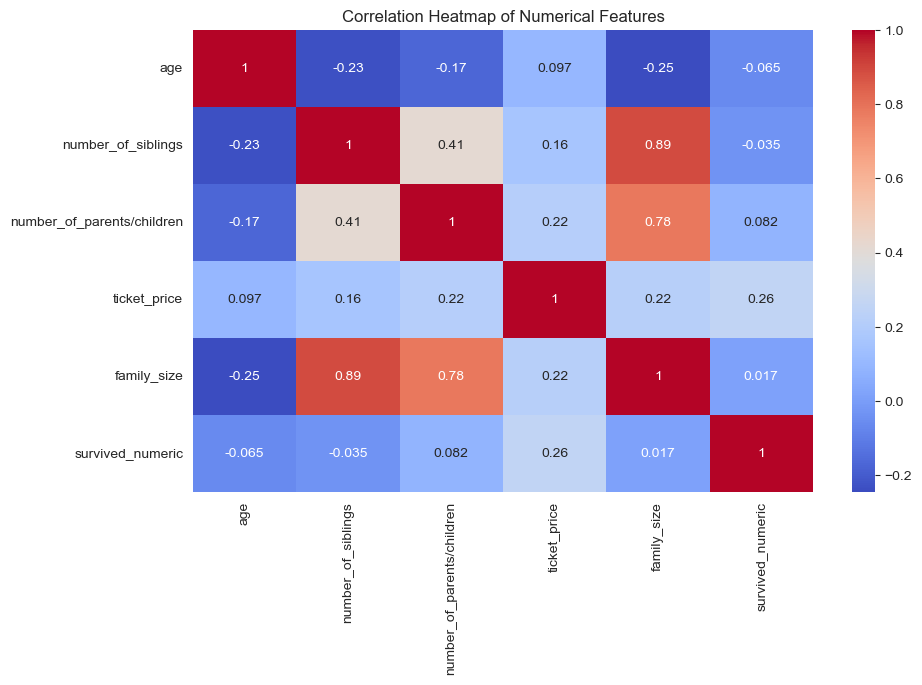

In [65]:
# Select only numeric columns for correlation
numeric_data = data_set.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

- There is a strong positive correlation between family_size and number_of_parents/children (correlation coefficient of 0.76). This indicates that as the number of parents/children aboard increases, the overall family size also increases.

- There is a moderate positive correlation between survival_status and ticket_price (correlation coefficient of 0.26). This suggests that passengers who paid higher fares had a better chance of survival, possibly reflecting socio-economic advantages.

# Review the Key Findings from the Plots

1. Survival by Age and Class:

Insight: You may observe that passengers in higher classes (Upper class) had better survival rates compared to lower-class passengers. Younger passengers (children) might also show better survival chances.

2. Survival by Age and Gender:

Insight: Typically, women and children had higher survival rates than men, especially younger women and children across different classes.

3. Survival by Class and Family Size:

Insight: Passengers in smaller families, especially in the upper class, had a higher chance of survival compared to those with larger families or those traveling alone in lower classes.

4. Correlation Between Numerical Features:

Insight: The heatmap can show relationships such as higher ticket prices (from the 'Upper class') being positively correlated with survival, while other factors, like family size, may negatively correlate with survival.

# Identify Key Patterns

- Class and Survival: Upper-class passengers were more likely to survive compared to middle and lower-class passengers.
- Age and Survival: Younger passengers, especially children, were prioritized during evacuation.
- Gender and Survival: Women had higher survival rates, aligning with the "women and children first" policy.
- Family Size and Survival: Passengers traveling alone or with smaller families had a slightly higher survival rate, possibly due to ease of managing smaller groups in emergencies.

# Summary

1. Class Influence: Passengers in the upper class had a significantly higher survival rate compared to those in lower and middle classes. This suggests a social hierarchy effect, where wealthier passengers had better access to lifeboats.

2. Age and Survival: Younger passengers, particularly children, had a noticeably higher survival rate. This highlights a prioritization during the rescue efforts.

3. Gender and Survival: Women had a much higher chance of survival compared to men, reinforcing the "women and children first" policy followed during the disaster.

4. Family Size: Smaller family sizes or individuals traveling alone were more likely to survive, especially in the upper class. Larger families might have faced difficulties staying together during the evacuation.

In [68]:
data_set.to_csv('cleaned_titanic_data.csv', index=False)

In [70]:
import shutil

source_file_path = '/mnt/data/Titanic_EDA_Final_Presentation.pptx'

# Destination path where you want to download the file locally (adjust the file path to your desired location)
destination_path = 'C:/Users/Abdul Basit/Desktop/Python Work'

# Copying the file from the source to the destination
shutil.copy(source_file_path, destination_path)

print(f"File saved to: {destination_path}")


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/Titanic_EDA_Final_Presentation.pptx'